Text(0.5, 1.0, 'Test 1')

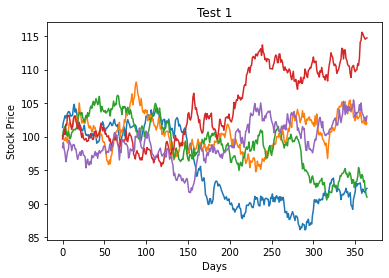

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import log, sqrt, pi, exp
from scipy.stats import norm
import pandas as pd
from pandas import DataFrame
from datetime import datetime, date


''' Using the geometric brownian motion to simulate the stock price paths '''

def geo_paths(S, T, r, q, sigma, steps, N):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield
    # sigma = volatility 
    
    Output
    # [steps,N] Matrix of asset paths 
    """
    dt = T/steps
    #S_{T} = ln(S_{0})+\int_{0}^T(\mu-\frac{\sigma^2}{2})dt+\int_{0}^T \sigma dW(t)
    ST = np.log(S) +  np.cumsum(((r - q - sigma**2/2)*dt + sigma*np.sqrt(dt) * np.random.normal(size=(steps,N))),axis=0)
    
    return np.exp(ST)

S = 100 #stock price S_{0}
K = 110 # strike
T = 1/2 # time to maturity
r = 0.05 # risk free risk in annual %
q = 0.02 # annual dividend rate
sigma = 0.18 # annual volatility in %
steps = 365 # time steps
N = 5 # number of trials


def d1 (S, K, T, r, sigma):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield  is assumed as zero
    # sigma = volatility 
    
    Output
    # d1 = d1(S,K,T,r,q,sigma)
    """
    
    return(log(S/K) + (r + sigma**2/2.)*T)/(sigma*sqrt(T))

def d2(S,K,T,r,sigma):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    # sigma = volatility 
    
    Output
    # d2 = d2(S,K,T,r,sigma)
    """
    
    return d1(S,K,T,r,sigma)-sigma*sqrt(T)

def BlackScholesCall(S,K,T,r,q,sigma):    
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))


def BlackScholesPut(S,K,T,r,q,sigma):
    return K*exp(-r*T)-S+BlackScholesCall(S,K,T,r,sigma)

    

paths= geo_paths(S,T,r, q,sigma,steps,N)

plt.plot(paths);
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Test 1")



Black Scholes Price is 1.9106446290170993
Simulated price is 0.9228562975490354
